#             INTRODUCTION 

Census data gives information about irish residents based on where and how they live, their age, nationality and more. For Republic of Ireland, census data is collected every five years by Central Statistics Office (CSO). The dataset provided for this project is the most recent census data, that was conducted in April 2016. In comparision to 2011, there was an increase in population by 3.7%. It has been observed that Ireland's population in 2016 was 4,757,976 persons. 

Irish census for 2016 can be used to study different themes like Irish Language, Families in Ireland, people with different agegroups, Private Households, Housing, Education, Disability, carers and general health. In this project, I plan to explore the following themes : Private Households, Housing, Motor car availability, PC ownership and internet access. Private Households gives us information about Private households by size, type of accomodation (Appartment, Bungalow etc.). Housing theme tells us about permanent private households by year built, type of occupancy, by number of rooms. Last theme i.e Motor Car Availability, PC Ownership and Internet is quite interesting and it gives us information about Number of households with personal computer, internet and cars.

During the data collection there were people who were unavailable, which were treated as unoccupied houses and temporary absent in our dataset. Based on this we can investigate on the true count of houses that were surveyed when data was collected. 

In past 10 years it has been observed that there is a housing crisis in Ireland, so census can be used to faciliatate local authorities to increase housing for the people of Ireland. Looking at the trend in number of houses built in Ireland over last 100 years, the first thought that arises is which period had the least and most number of houses constructed.

Further investigation can be done if there is a linear relationship between the number of houses/bungalows, the number of motorcars. Additionally, we can research if there is linear relationship betweeen houses with computers and houses with internet and broadband.

This report will firstly look over the data based on different counties of Ireland. This dataset will further be grouped into years, to explore the characterstics of each group. The variables examined for our analysis will be summarized based on different graphical and numerical summaries.

# DATA CLEANING/PRE PROCESSING

## Importing Libraries

Firstly, I am importing required libraries which will be required for data manipulation, plotting and linear regression. Few of the libraries are : pandas for manipulating numerical data, numpy, matplotlib and seaborn for plotting, stats, statsmodels and sklearn for regression.

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as figure
import seaborn as sns
from scipy import stats
import statsmodels.api as smf
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Importing 2016 Irish Census Dataset

In [4]:
# column list for dataset
cols_list = ['GEOGDESC',
             'T5_2_1PH', 'T5_2_2PH', 'T5_2_3PH', 'T5_2_4PH', 'T5_2_5PH', 'T5_2_6PH', 'T5_2_7PH',
             'T5_2_GE8PH', 'T5_2_TH', 'T5_2_1PP', 'T5_2_2PP', 'T5_2_3PP', 'T5_2_4PP', 'T5_2_5PP',
             'T5_2_6PP', 'T5_2_7PP', 'T5_2_GE8PP', 'T5_2_TP',
             'T6_1_HB_H', 'T6_1_FA_H', 'T6_1_BS_H', 'T6_1_CM_H', 'T6_1_NS_H', 'T6_1_TH',
             'T6_1_HB_P', 'T6_1_FA_P', 'T6_1_BS_P', 'T6_1_CM_P', 'T6_1_NS_P', 'T6_1_TP',
             'T6_2_PRE19H', 'T6_2_19_45H', 'T6_2_46_60H', 'T6_2_61_70H', 'T6_2_71_80H', 
             'T6_2_81_90H', 'T6_2_91_00H', 'T6_2_01_10H', 'T6_2_11LH', 'T6_2_NSH', 'T6_2_TH',
             'T6_2_PRE19P', 'T6_2_19_45P', 'T6_2_46_60P', 'T6_2_61_70P', 'T6_2_71_80P', 'T6_2_81_90P',
             'T6_2_91_00P', 'T6_2_01_10P', 'T6_2_11LP', 'T6_2_NSP', 'T6_2_TP', 'T6_8_O',
             'T6_4_4RH', 'T6_4_5RH', 'T6_4_6RH', 'T6_4_7RH', 'T6_4_GE8RH',
             'T6_8_TA', 'T6_8_UHH', 'T6_8_OVD', 'T6_8_T',
             'T15_1_NC', 'T15_1_1C', 'T15_1_2C', 'T15_1_3C', 'T15_1_GE4C', 'T15_1_NSC', 'T15_1_TC',
             'T15_2_Y', 'T15_2_N', 'T15_2_NS', 'T15_2_T', 'T15_3_B', 'T15_3_OTH', 'T15_3_N', 'T15_3_NS',
             'T15_3_T']

# Load the data using read_csv function.
# data with ',' formatted converted to integer using thousands parameter.
census_2016 = pd.read_csv('Census_by_county.csv', usecols=cols_list, encoding = 'unicode_escape', thousands=',')

Census data is generally collected by Central Statistics Office(CSO) for a range of geographical levels which includes 31 counties, 138 electoral areas and small areas. Read.csv() function has been used to load the 2016 census data, encoding = 'unicode_escape' has been passed as a parameter to deal with files in different formats. thousands parameter has also been used to convert strings to integers.

### Rename the columns of dataset
Renaming of columns is an essential part in data preprocessing, as it gives meaningful and logical names to the columns of dataset. In this way, it would be easy to interpret what information each column gives in the dataset. Rename() function has been used to rename the columns of census_2016. Index of dataset has been set to name of the counties with the help of function set_index()

In [5]:
census_2016 = census_2016.rename({'T5_2_1PH':'Households_1person', 'T5_2_2PH':'Households_2person',
'T5_2_3PH':'Households_3person', 'T5_2_4PH':'Households_4person',
'T5_2_5PH':'Households_5person', 'T5_2_6PH':'Households_6person',
'T5_2_7PH':'Households_7person', 'T5_2_GE8PH':'Households_8_or_moreperson'
}, axis='columns')

## drop 'T5_2_TH':'Total No.of Households' 

census_2016 = census_2016.rename({'T6_1_HB_H':'No_of_house_Bungalow', 'T6_1_FA_H':'No_of_Flat_Appartment',
'T6_1_BS_H':'No_of_Bedsit', 'T6_1_CM_H':'No_of_Caravanmobile_home', 
'T6_1_NS_H':'Not_stated', 'T6_1_TH':'Total_No_of_households'
}, axis='columns')

# Permanent private households by year built 
census_2016 = census_2016.rename({'T6_2_PRE19H':'Pre 1919', 'T6_2_19_45H':'1919-1945', 
'T6_2_46_60H':'1946-1960', 'T6_2_61_70H':'1961-1970', 
'T6_2_71_80H':'1971-1980', 'T6_2_81_90H':'1981-1990',
'T6_2_91_00H':'1991-2000', 'T6_2_01_10H':'2001-2010', 
'T6_2_11LH':'2011_or_later','T6_2_NSH':'Not stated1', 
'T6_2_TH':'Total_houses_years'
}, axis='columns')

census_2016 = census_2016.rename({'T6_4_4RH':'Households_4rooms', 'T6_4_5RH':'Households_5rooms', 
'T6_4_6RH':'Households_6rooms', 'T6_4_7RH':'Households_7rooms', 
'T6_4_GE8RH':'Households_greater_than8rooms'
}, axis='columns')

# Occupancy status of permanent dwellings on Census night
census_2016 = census_2016.rename({'T6_8_O':'Occupied', 'T6_8_TA':'Temporarily_absent', 
'T6_8_UHH':'Unoccupied_holiday_homes', 'T6_8_OVD':'Other_vacant_dwellings',
'T6_8_T' : 'Total', }, axis='columns')

# No. of households with car, computers and internet.
census_2016 = census_2016.rename({'T15_1_NC':'No_motor_car', 'T11C':'1motor_car', 'T15_1_2C':'2motor_cars', 
'T15_1_3C':'3motor_cars', 'T15_1_GE4C' : '4_or_more_motor_cars', 
'T15_1_NSC' : 'Not_stated_about_cars', 'T15_1_TC' : 'Total_data',
'T15_2_Y':'Personal_computer_yes', 'T15_2_N':'Personal_computer_no',
'T15_2_NS':'Personal_computer_notstated',
'T15_2_T':'Total_data_computers',
'T15_3_B':'Broadband', 'T15_3_OTH':'other', 'T15_3_N':'Internet_no',
'T15_3_NS':'Internet_notstated', 'T15_3_T':'Total_data_internet'
}, axis='columns')

# setting the index as counties
census_2016 = census_2016.set_index('GEOGDESC')

Creating a new dataframe 'census_2016_houses' for houses which has columns 'Percent_house_bungalows': Percentage of houses or bungalows, 'Percent_flats_appartment': Percentage of flats or appartments, 'Percent_2_or_more_motorcars': Percentage of households with 2 or more motor cars, 'Percent_3motorcars': Percentage of houses with 3 motor cars,  'Percent_4_or_more_motorcars': Percentage of households with 4 or more motor cars, 'Percent_4_or_morepersons': Percentage of households with 4 or more persons.

In [6]:
# Create census_2016_houses dataframe
census_2016_houses = pd.DataFrame()
# Percentage of bungalows
census_2016_houses['Percent_house_bungalows'] = census_2016['No_of_house_Bungalow']*100/census_2016['Total_No_of_households']

# Percentage of appartments
census_2016_houses['Percent_flats_appartment'] = census_2016['No_of_Flat_Appartment']*100/census_2016['Total_No_of_households']

# Percentage of houses with 2 or more motor cars
census_2016_houses['Percent_2_or_more_motorcars'] = (census_2016['2motor_cars'] + census_2016['3motor_cars'] + census_2016['4_or_more_motor_cars'])*100/census_2016['Total_data']

# Percentage of houses with 3 motor cars
census_2016_houses['Percent_3motorcars'] = census_2016['3motor_cars']*100/census_2016['Total_data']

# Percentage of houses with 4 or more motor cars
census_2016_houses['Percent_4_or_more_motorcars'] = census_2016['4_or_more_motor_cars']*100/census_2016['Total_data']

census_2016_houses['Households_4_or_morepersons'] = census_2016['Households_4person']
+ census_2016['Households_5person'] + census_2016['Households_6person']
+ census_2016['Households_7person'] + census_2016['Households_8_or_moreperson']

# Percentage of houses with 4 or more persons
census_2016_houses['Percent_4_or_morepersons'] = census_2016_houses['Households_4_or_morepersons']*100/census_2016['Total_data']

# Percentage of houses with 4 or more rooms
census_2016_houses['Percent_4_or_morerooms'] = (census_2016['Households_4rooms']+census_2016['Households_5rooms']+census_2016['Households_6rooms']+census_2016['Households_7rooms']+
census_2016['Households_greater_than8rooms'])*100/census_2016['Total_No_of_households']

Creating a new data frame 'census_2016_computers' which has information about households with computers, without computers, broadband, no internet, other, and total number of houses.

In [7]:
census_2016_computers = census_2016[['Personal_computer_yes','Personal_computer_no','Personal_computer_notstated','Broadband','Internet_no','other','Internet_notstated','Total_data_internet']]

### Finding Missing and Duplicate Values in Dataset

There are 31 regions in the census_2016, which can be used as an index for the dataset. Next, we need to check if there are any missing values in the dataset. This can be done with the help of is.na() function. We can see, there are no missing values in census_2016. There are 31 rows and 73 columns in the dataset. 31 rows corresponds to different counties in Ireland. There are no duplicate records in dataset as there are 31 different counties in the dataset. This can also be checked using function drop_duplicates().

In [8]:
#isna() function can be used to check if there are any missing values.
census_2016.isna().sum()
#drop_duplicates() can be used to drop duplicates
census_2016 = census_2016.drop_duplicates()
# check no. of rows and columns in dataset
shape = census_2016.shape

# EXPLORATORY DATA ANALYSIS

Exploratory Data Analysis helps in understanding the data better by graphical and numerical summaries.

## Percentage of Occupied Households

It is important to know how many households were occupied or unoccupied when the census was recorded. On Census night, when the data was collected for different counties, no information was received from few households. It varies from region to region. Most of the houses were occupied during that time, but it would be interesting to know percentage of occupied dwellings for different counties. There were 8 counties namely Clare, Donegal, Kerry, Leitrim and so on where the less than 80% of houses were occupied. Among them Leitrim has the lowest percentage of occupied dwelling i.e 69.17 while south Dublin had the highest which is around 94.081.

Barplot has been used to convey information about percentage of occupied dwellings on census night. Names of the counties appear on x-axis in the plot. There are few queries which remain unswered through barplots : the average number of occupied dwellings, minimum and maximum bumber of occupied dwellings.

To answer all these question, numerical summary has been calculated. According to the summary, approximately 84.235% of houses were occupied across Republic of Ireland while 50% of the counties, had number of percentage of houses occupied as 86.359. However, it can be said that if there are more no. of occupied households when census is recorded, it will eventually help the authorities to aid in infrastructure and other facilities involving building new houses.

There can be various reasons why the houses were not occupied. Few of the reasons can be people were temporarily absent from the houses, people might have gone out during holidays or there were unoccupied holiday homes.

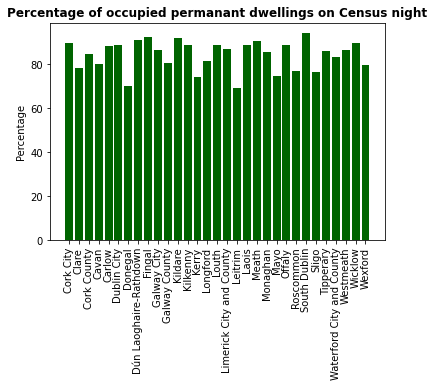

In [9]:
## Occupancy status:
## Occupancy status of permanent dwellings on Census night
census_occupied = census_2016[['Occupied','Temporarily_absent', 'Unoccupied_holiday_homes', 
'Other_vacant_dwellings', 'Total']]
# Percentage of occupied houses
census_occupied['Occupied_percentage'] = census_occupied['Occupied']*100/census_occupied['Total']
counties = list(census_occupied.index)
# plot barplot
plt.bar(counties,census_occupied['Occupied_percentage'], color='darkgreen')
# title for the plot
plt.title('Percentage of occupied permanant dwellings on Census night', fontweight='bold')
# y-label for the plot
plt.ylabel('Percentage')
plt.xticks(rotation='vertical')
plt.show()
## List of counties where percentage of Occupied dwellings is less than 75%
counties_occupied_80 = census_occupied[census_occupied['Occupied_percentage']<80]

In [10]:
### Numerical Summary for Occupied Percentage For Different counties
census_occupied[['Occupied_percentage']].describe()

,Occupied_percentage
count,31.000000
mean,84.235324
std,6.658929
min,69.170683
25%,79.840893
50%,86.359447
75%,88.757866
max,94.081535


## Number of Houses built over last 100 years

Based on the above result, let's look at the data for four major counties : Cork, Dublin, Galway and Limerick where the occupied percentage of dwellings on census night was greater than 85%. Here we will be looking at how many permanent private households were built for different range of timelines : 'Pre 1919', '1919-1945', '1946-1960', '1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011_or_later'. 

In [11]:
## fetching data for different counties for different years.
year_data = census_2016[['Pre 1919', '1919-1945', '1946-1960', '1961-1970', '1971-1980', '1981-1990',
'1991-2000', '2001-2010', '2011_or_later']]

In [12]:
# Fetching data for county Cork
data_cork = pd.DataFrame(year_data.iloc[2])
data_cork.reset_index(level=0, inplace=True)
data_cork.columns = ['Year','Houses']

# Fetching data for Dublin city
data_dublin = pd.DataFrame(year_data.iloc[5])
data_dublin.reset_index(level=0, inplace=True)
data_dublin.columns = ['Year','Houses']

# Fetching data for Galway
data_Galway = pd.DataFrame(year_data.iloc[10])
data_Galway.reset_index(level=0, inplace=True)
data_Galway.columns = ['Year','Houses']

# Fetching data for Galway
data_Limerick = pd.DataFrame(year_data.iloc[10])
data_Limerick.reset_index(level=0, inplace=True)
data_Limerick.columns = ['Year','Houses']

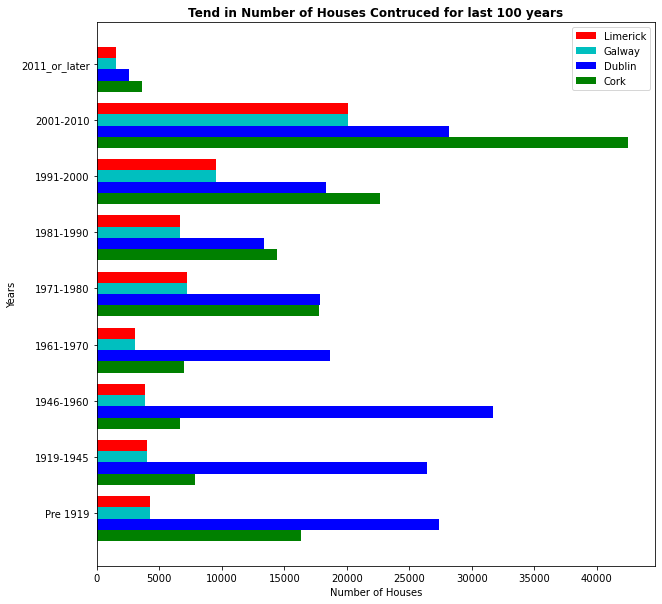

In [13]:
# Code for Trend in Number of Houses constructed in last 100 years.

# Represent the y-axis
dim = np.arange(9)
# setting the width
width = 0.2
fig, f = plt.subplots(figsize=(10,10))
#barchart for cork
cork = f.barh(dim, data_cork['Houses'], width, color='g', align='center')
#barchart for dublin
dublin = f.barh(dim + width, data_dublin['Houses'], width, color='b', align='center')
#barchart for galway
galway = f.barh(dim + width + width , data_Galway['Houses'], width, color='c', align='center')
#barchart for limerick
limerick = f.barh(dim + width + width + width, data_Limerick['Houses'], width, color='r', align='center')
#adjust the size of the yticks
f.set_yticks(dim + 2 * width)
#set the name of counties as y ticks
f.set_yticklabels((x for x in data_cork['Year']))
f.legend((limerick[0], galway[0], dublin[0], cork[0]), ('Limerick', 'Galway', 'Dublin', 'Cork',))
plt.title('Tend in Number of Houses Contruced for last 100 years', fontweight="bold")
plt.ylabel('Years')
plt.xlabel('Number of Houses')
plt.show()

Here, I am plotting the graphs for different counties and cities which shows the number of houses built for different years.

County Cork is the largest and southernmost county of Ireland. As of 2016, the county had a population of 542,866 making it the third most populous county in Ireland. It has been seen in media that there are effects of the ongoing housing crisis, and it could get more worse as the city's population expands. By looking at the trend in the graph, it can be inferred that betweeen 1919 to 1970, small amount of houses were built. After 1970's there was a significant increase in the construction of private households and between 2001 to 2010, more than 40,000 houses were constructed. But there were hardly any houses built between 2011 to 2016.

Dublin is the capital and largest city of Ireland. It has an urban population of 1,173,179. Dublin has always been the historical centre for Irish education, culture and industries. According to the latest rankings, it is one of the leading tech cities in Europe. As a result, there could be a huge influx in population i.e people migrating from different countries for more opportunities and better lifestyle. Because of this, there is a huge demand for houses.
That is the main reason, why prices of houses in Dublin has increased in last 10 years. The trend in construction of households indicates that between 1910 to 1960, there were many houses built. Between 1980 to 2000, small count of houses built. From 2001 to 2010, approximately 27000 houses were built in Dublin. From 2011 to 2016, there were hardly any houses built.

Galway is a harbour city on Ireland's west coast with a population of 79,934 according to 2016 census. Limerick is also one of the major city in Republic of Ireland with a population of around 94,192. Similar pattern can be observed for both Galway and Limerick indicating that 20,000 private houses were constructed between 2001 to 2010 for each county.

## Percentage of No. of Bungalows for Counties

There are many bungalows as compared to apartments or carvanmobile homes. It is quite interesting to know how many bungalows are there for each county with respect to total number of households in each county. Average percentage of bungalows in all the counties is 89.72%. Dublin City has minimum percentage of bungalows i.e 63.145% while  Roscommon has maximum percentage of bungalows i.e 96.035%. 25% of the counties have bungalows less than 89.533%, 75% of counties has bungalows less than 94.159%.

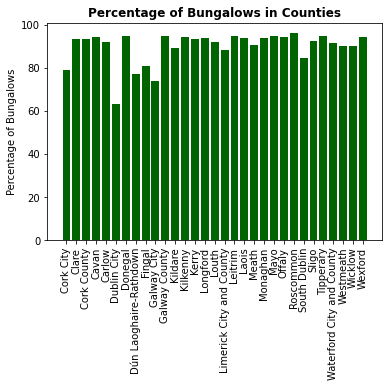

In [14]:
plt.bar(counties,census_2016_houses['Percent_house_bungalows'], color='darkgreen')
plt.title('Percentage of Bungalows in Counties', fontweight='bold')
plt.xticks(rotation='vertical')
plt.ylabel('Percentage of Bungalows')
plt.show()

In [15]:
census_2016_houses[['Percent_house_bungalows']].describe()

,Percent_house_bungalows
count,31.000000
mean,89.728632
std,7.507521
min,63.145641
25%,89.533324
50%,93.103131
75%,94.159247
max,96.035481


### Factors influencing percentage of bungalows

According to surveys, it has been discovered that households with 4 or more rooms, 2 or more motor cars, with 4 or more persons are bungalows. As it has been concluded, there is a very less percentage of apartments for each county. There are not many apartments or flats in Ireland. If there are more than 4 or more rooms, houses are generally bungalows and not apartments. Because in general, apartments or flats are not huge. In general, it's difficult to find apartments or flats with more than 4 rooms. This is also indicated through plot between percentage of bungalows and percentage of houses with 4 or more rooms.

Apart from number of rooms, number of motor cars, number of persons living in a house can also indicate if it's a bungalow or a flat.

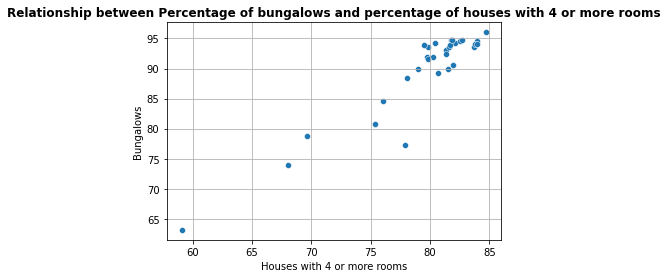

In [16]:
sns.scatterplot(x='Percent_4_or_morerooms', y='Percent_house_bungalows', data=census_2016_houses)
plt.title('Relationship between Percentage of bungalows and percentage of houses with 4 or more rooms' , fontweight="bold")
plt.grid(True)
plt.xlabel('Houses with 4 or more rooms')
plt.ylabel('Bungalows')
plt.show()

## Internet or Broaband usage in Regions

The internet started in the 1960s as a way by government researchers to share information across the globe. This eventually led to formation of the ARPANET, which evolved into internet. Parellely computers were also evolved in 1940s, in today's world internet and computers go hand-in-hand. 
With the help of science and technology, computers and internet both have evolved parellely. Nowadays, it is quite common to see people using internet and computer in their day to day life.

In [17]:
# Top 5 counties with maximum number of broaband connections in houses
census_2016_computers['Broadband_percentage'] = census_2016_computers['Broadband']*100/census_2016_computers['Total_data_internet']
census_2016_computers[['Broadband_percentage']].sort_values(by='Broadband_percentage',ascending=False).head()

,Broadband_percentage
GEOGDESC,
Dún Laoghaire-Rathdown,86.008299
Fingal,84.978314
South Dublin,83.285530
Kildare,77.828980
Galway City,77.590453


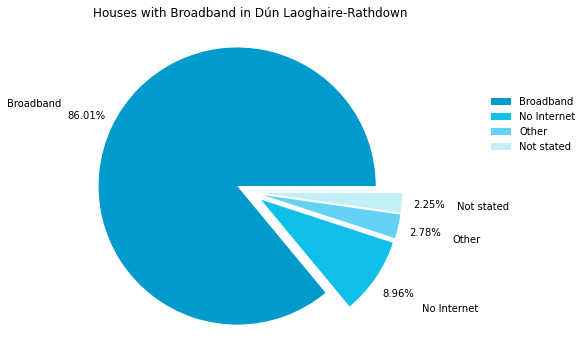

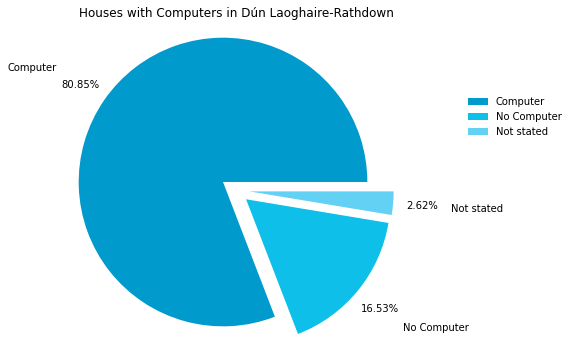

In [29]:
# Code for pie chart for Internet usage and Computers in Dún Laoghaire-Rathdown

census_2016_internet = census_2016_computers[['Broadband', 'Internet_no', 'other', 'Internet_notstated', 'Total_data_internet']]

data = pd.DataFrame(census_2016_internet.iloc[7])
# Calculating percentage values
per_broaband_dun = round(data['Dún Laoghaire-Rathdown']['Broadband']*100/data['Dún Laoghaire-Rathdown']['Total_data_internet'],2)
per_broaband_no_internet = round(data['Dún Laoghaire-Rathdown']['Internet_no']*100/data['Dún Laoghaire-Rathdown']['Total_data_internet'],2)
per_broaband_other = round(data['Dún Laoghaire-Rathdown']['other']*100/data['Dún Laoghaire-Rathdown']['Total_data_internet'],2)
per_broaband_notstated = round(data['Dún Laoghaire-Rathdown']['Internet_notstated']*100/data['Dún Laoghaire-Rathdown']['Total_data_internet'],2)

fig, ax = plt.subplots(figsize=(6,6))
# Define labels
labels = ['Broadband', 'No Internet', 'Other', 'Not stated']
# values of percentage 
percentages = [per_broaband_dun, per_broaband_no_internet, per_broaband_other, per_broaband_notstated]
# list of colors
color_palette_list = ['#009ACD', '#0EBFE9', '#63D1F4','#C1F0F6', '#ADD8E6',   
                       '#0099CC']
explode=(0.1,0.1,0.1,0.1)
# pie plot
ax.pie(percentages,labels=labels, explode=explode,  
       colors=color_palette_list[0:4], autopct='%1.2f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
# set title
ax.set_title("Houses with Broadband in Dún Laoghaire-Rathdown")
# legend
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

# Calculating percentage values for computers

data_comp = pd.DataFrame(census_2016_computers.iloc[7])
per_computers_dun = round(data_comp['Dún Laoghaire-Rathdown']['Personal_computer_yes']*100/data_comp['Dún Laoghaire-Rathdown']['Total_data_internet'],2)
per_computers_no_internet = round(data_comp['Dún Laoghaire-Rathdown']['Personal_computer_no']*100/data_comp['Dún Laoghaire-Rathdown']['Total_data_internet'],2)
per_computers_notstated = round(data_comp['Dún Laoghaire-Rathdown']['Personal_computer_notstated']*100/data_comp['Dún Laoghaire-Rathdown']['Total_data_internet'],2)
fig, ax = plt.subplots(figsize=(6,6))
# Define labels
labels = ['Computer', 'No Computer','Not stated']
# values of percentage 
percentages_comp = [per_computers_dun, per_computers_no_internet, per_computers_notstated]
# list of colors
color_palette_list = ['#009ACD', '#0EBFE9', '#63D1F4','#C1F0F6', '#ADD8E6',   
                       '#0099CC']
explode=(0.1,0.1,0.1)
# pie plot
ax.pie(percentages_comp,labels=labels, explode=explode,  
       colors=color_palette_list[0:3], autopct='%1.2f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
# set title
ax.set_title("Houses with Computers in Dún Laoghaire-Rathdown")
# legend
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

It is estimated that nearly 80% of the population use internet everyday. It is observed that percentage of houses having broadband varies from region to region and even counties. Dún Laoghaire-Rathdown, Fingal, South Dublin, Kildare, Galway City are among the top 5 regions in Ireland where most houses have broadband. Among them Dún Laoghaire has the highest percentage of houses having broadband. This can depicted from pie chart which clearly shows how many houses have broaband, no internet, internet not stated and others. It gives a clear picture of a particular region.

In Dún Laoghaire-Rathdown, approximately 86% of houses have broadband connection while 8.96% doesn't have internet and 2.25% haven't stated anything. Similarly, the data was collected for households with computers, it was surprising to know that approximately 81% of the private households had personal computers while 16.53% didn't have computers. There seems to be a strong relation between houses with broadband and houses with computers. In the following section, we can explore this connection on a much deeper level.

# STATISTICAL ANALYSIS

To test if our initial assumptions on a population should be accepted or not, we use Hypothesis Testing. It improves our decision making. Linear Regression is used to fit a model that predicts a value based on its input variables. In our context, we will check if percentage of bungalows depends on percentage of 4 or more rooms and 2 or more motor cars. We will also check if the number of houses with computers depends on number of houses with broadband.

## Linear Relationship betweeen Percentage of bungalows and other factors

There is a theory that percentage of bungalows depends on numerous factors like percentage of houses with 4 or more rooms, percentage of houses with 2 or more motor cars or percentage of houses with 4 or more persons. The scatterplots below will help to better understand all the relationships between the variables. For this, pairplot has been used and it shows that there is a positive linear relationship between percentage of bungalows, percentage of houses with 4 or more rooms, percentage of houses with 4 or more persons and percentage of houses with 2 or more cars. Correaltion value and p value will also help us in understanding whether the relationship between percentage of bungalows and other factors is positive and if the factors can be considered significant on fitting a linear model.

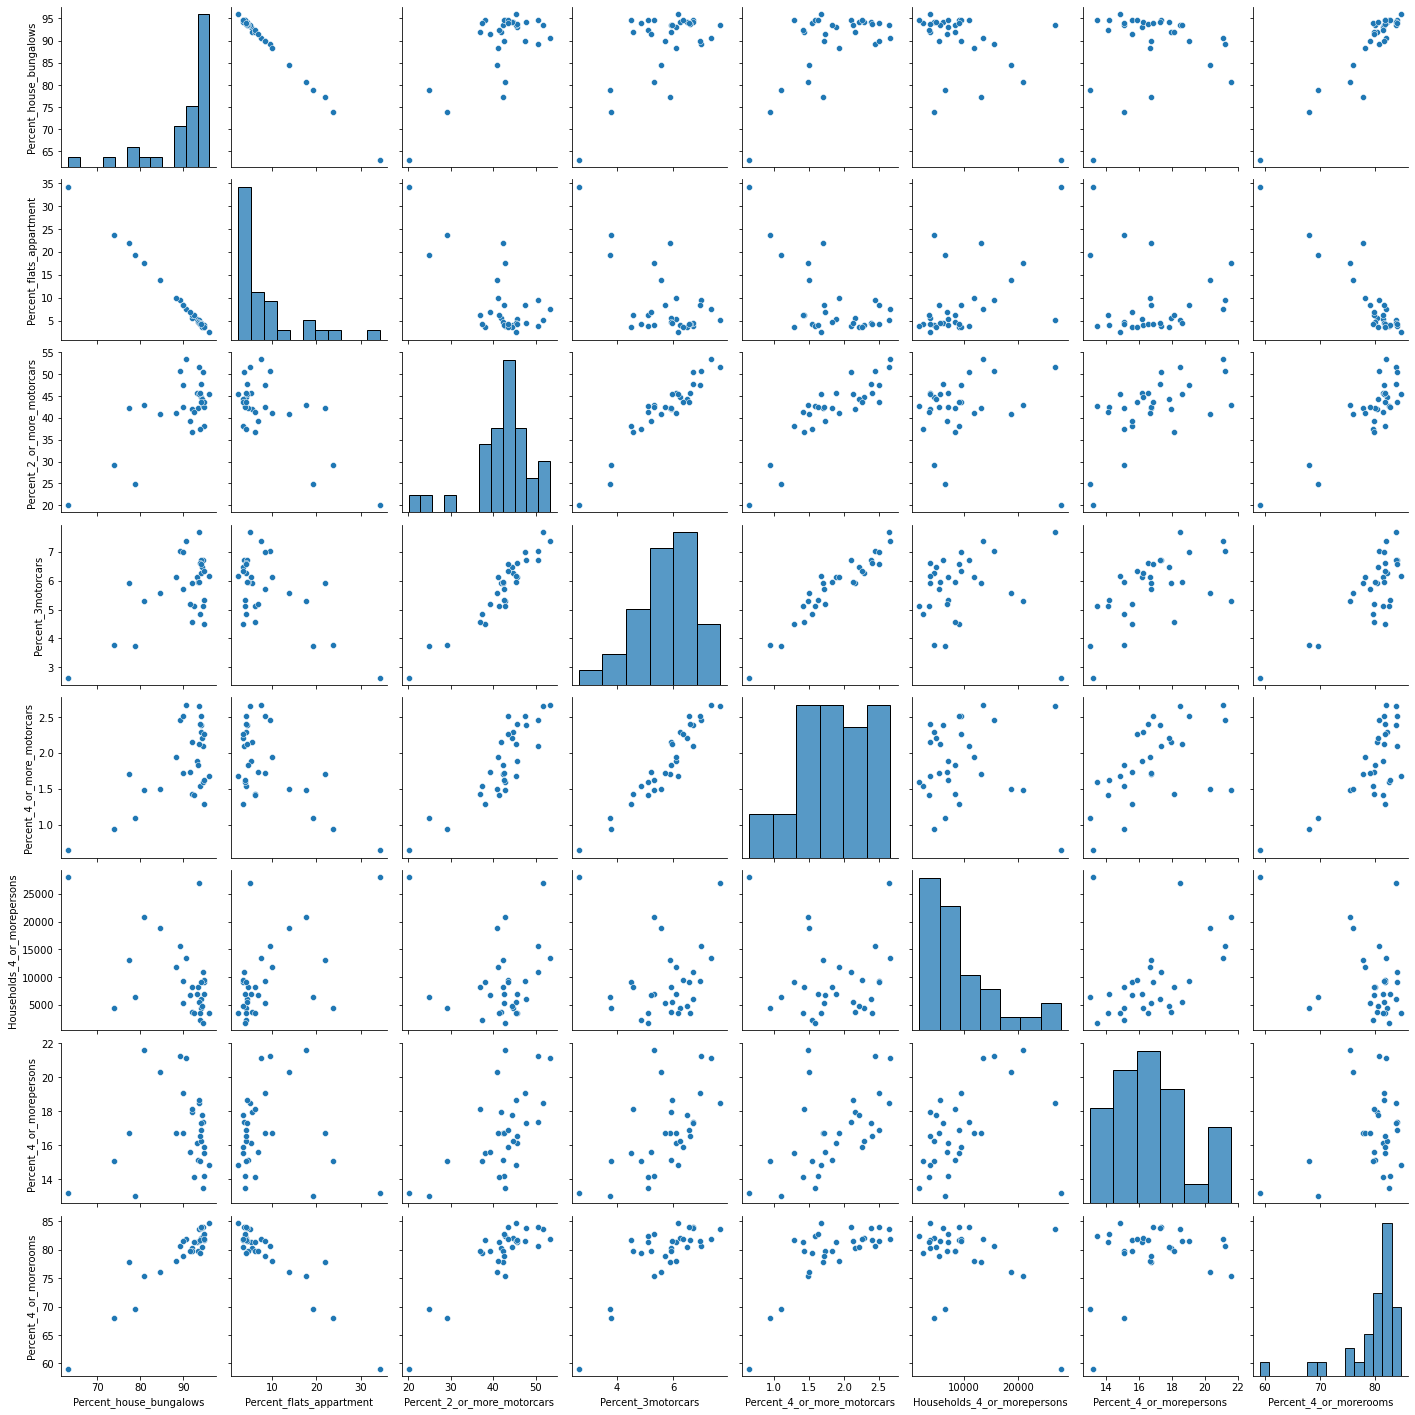

In [19]:
sns.pairplot(census_2016_houses)
plt.show()

In [20]:
print("(Percentage of bungalows, p-value)")
for i in (census_2016_houses.drop(["Percent_house_bungalows"], axis=1)).columns:
    correlation = stats.pearsonr(census_2016_houses[i],census_2016_houses["Percent_house_bungalows"])
    print(i, correlation)

(Percentage of bungalows, p-value)
Percent_flats_appartment (-0.9988998011556486, 4.268223180686609e-40)
Percent_2_or_more_motorcars (0.7052236322790412, 9.417337658163379e-06)
Percent_3motorcars (0.6205609537091011, 0.00019577716083552551)
Percent_4_or_more_motorcars (0.6125899783431821, 0.0002491535472179384)
Households_4_or_morepersons (-0.5141858841575151, 0.003085465385939902)
Percent_4_or_morepersons (0.10181390847717936, 0.585753423921161)
Percent_4_or_morerooms (0.9365067950138346, 9.882438358277651e-15)


### Hypothesis 1 : Percentage of households with 4 or more persons is not significant with respect to percentage of bungalows

Our null hypothesis states that percentage of households with 4 or more persons is not significant with respect to percentage of bungalows. Correlation value is 0.108 which infers that there is a very week correaltion between percentage of bungalows and houses with 4 or more persons. Moreover, p-value is 0.585 which is very high. There is rule in hypothesis : If p-value is less that 0.05(our chosen significance level), we will reject the null hypothesis, else we fail to reject the null hypothesis.

At 5% significance level, we fail to reject null hypothesis which means that there is not enough evidence to say that percentage of households with 4 or more persons is significant with respect to percentage of bungalows. 

### Hypothesis 2 : Percentage of households with 4 or more rooms is not significant with respect to percentage of bungalows

Percentage of bungalows is highly correlated with percentage of 4 or more rooms, which is evident from the correlation value i.e  0.93650. p-value is 9.882438358277651e-15, which is less than 0.05. Therefore, at 5% significance level, it can be inferred that we have enough evidence to reject the null hypothesis i.e percentage of houses with 4 or more rooms is significant with respect to bungalows.

### Hypothesis 3 : Percentage of households with 2 or more motor cars  is not significant with respect to percentage of bungalows

Percentage of 2 or more motor cars is positively corelated with percentage of bungalows with a corelation value of 0.70522. p-value is extremely compared to 0.05, which infers than at 5% level of significance, we have enough evidence to reject null hypothesis. Hence, percentage of 2 or more motor cars is significant with respect to bungalows and and it can be used while fitting the model.

### Predicting number of Bungalows in Ireland

After doing hypothesis testing, houses with 2 or more motor cars and houses with 4 or more rooms can be used for predicting the percentage of bungalows in Ireland for any county or region. 

In [21]:
# Linear Regression model

# Percent_house_bungalows is a response variable.
y = census_2016_houses[['Percent_house_bungalows']]
# Independent variables
x = census_2016_houses[['Percent_2_or_more_motorcars', 'Percent_4_or_morerooms']]
# Splitting the test data to train data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=10)
# Building a linear model
house_model = smf.OLS(y_train,x_train)
# Fitting the model
house_result = house_model.fit()
# Summary for model
house_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Percent_house_bungalows   R-squared (uncentered):                   1.000
Model:                                 OLS   Adj. R-squared (uncentered):              1.000
Method:                      Least Squares   F-statistic:                          2.462e+04
Date:                     Mon, 20 Dec 2021   Prob (F-statistic):                    4.10e-36
Time:                             02:35:53   Log-Likelihood:                         -47.041
No. Observations:                       23   AIC:                                      98.08
Df Residuals:                           21   BIC:                                      100.4
Df Model:                                2                                                  
Covariance Type:                 nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Percent_2_or_more_motorcars    -0.1445      0.085     -1.691      0.106      -0.322       0.033
Percent_4_or_morerooms          1.2096      0.046     26.345      0.000       1.114       1.305
==============================================================================
Omnibus:                        1.452   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                0.734
Skew:                          -0.436   Prob(JB):                        0.693
Kurtosis:                       3.068   Cond. No.                         21.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#Prediction of test data
predicted_values = list(house_result.predict(x_test))
result_bungalows = y_test
result_bungalows['Predicted Percent_house_bungalows'] = predicted_values
result_bungalows.columns = ['Actual_bungalows', 'Predicted_Bungalows']

In [23]:
result_bungalows

,Actual_bungalows,Predicted_Bungalows
GEOGDESC,,
Monaghan,93.854027,92.269599
Dún Laoghaire-Rathdown,77.280187,88.075128
Dublin City,63.145641,68.571584
Cork County,93.511424,93.756026
Cavan,94.185657,92.891625
Mayo,94.758584,93.918105
Kerry,93.500083,90.508763
Waterford City and County,91.540564,90.942131


After doing the hypothesis for which variables are significant in our model, significant variables can be included while fitting the data for Linear Regression. Durlin-Watson test gives the value of 1.562, which means percentage of 4 or more rooms in a house is slightly positively corelated with percentage of 2 or more motor cars. But if the value is between 1.5 and 2.5, it can be assumed they are normal and nothing needs to be done from our end. Coefficients have been estimated through Least square method.

## Relationship between houses with computers and houses with broadband

It is assumed that houses with broadband must have personal computer in the houses. For this claim, hypothesis testing can be done to strengthen this claim.
Null Hypothesis : Houses with computers doesn't depend on houses with internet. In other words they don't have any relation betweeen them. To check if there is any linear relationship between them, it would be better to draw a scatter plot between them. With the help of scatterplot, it is evident that there is a strong positive linear relationship between them. Correlation value is 0.996, which tells how strongly houses with computers are correlated with houses with broadband. As the number of houses with broadband increases, number of houses with computers also show a rise.

In [24]:
# correlation value 
census_2016_computers['Personal_computer_yes'].corr(census_2016_computers['Broadband'])

0.9963696780834058

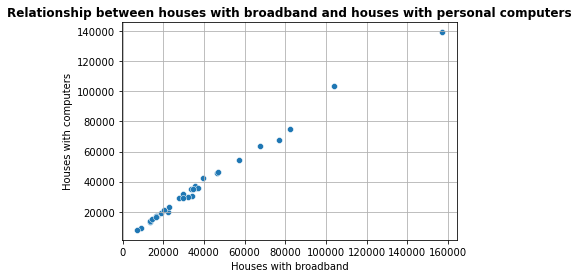

In [25]:
sns.scatterplot(x='Broadband', y='Personal_computer_yes', data=census_2016_computers)
plt.title('Relationship between houses with broadband and houses with personal computers' , fontweight="bold")
plt.grid(True)
plt.xlabel('Houses with broadband')
plt.ylabel('Houses with computers')
plt.show()

This clearly indicates that p-value is less than 0.05, hence we can reject null hypothesis and thus say that houses with broadband is significant in terms of predicting houses with computers.

In [26]:
# Response Variable
y = census_2016_computers[['Personal_computer_yes']]
# Independent variables
x = census_2016_computers[['Broadband']]
# Splitting the test data to train data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=10)
comp_model = smf.OLS(y_train,x_train)
comp_result = comp_model.fit()
comp_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     Personal_computer_yes   R-squared (uncentered):                   0.996
Model:                               OLS   Adj. R-squared (uncentered):              0.996
Method:                    Least Squares   F-statistic:                              5931.
Date:                   Mon, 20 Dec 2021   Prob (F-statistic):                    2.93e-29
Time:                           02:35:53   Log-Likelihood:                         -219.02
No. Observations:                     24   AIC:                                      440.0
Df Residuals:                         23   BIC:                                      441.2
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Broadband      0.9527      0.012     77.014      0.000       0.927       0.978
==============================================================================
Omnibus:                       10.706   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                9.377
Skew:                          -1.106   Prob(JB):                      0.00920
Kurtosis:                       5.118   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Before fitting the model, we split the data into training data and test data. Around 75% of the data is considered for training while 25% of the data for testing. From the model, it can be inferred that on one unit increase in broadband connection in Ireland, approximately 1 unit of computer will be sold in Ireland. R-squared value is 0.996. R-squared value ranges from 0 to 1, value of 0.996 explains that 99.6% of the variation in number of houses with computers is explained by number of houses with broadband. Equivalently, we can say that our model fits the data very well.
After predicting the values of number of houses with computers based on number of houses with broadband, there are residuals which can be observed which is measured as the difference between actual number of houses with computers and the predicted number of houses with computers.

In [27]:
#Prediction of test data

predicted_values = list(np.round(comp_result.predict(x_test)))
result_computers = y_test
result_computers['Predicted Percent_house_bungalows'] = predicted_values
result_computers.columns = ['Actual','Predicted']

In [28]:
result_computers

,Actual,Predicted
GEOGDESC,,
Monaghan,13813,12975.0
Dún Laoghaire-Rathdown,63526,64380.0
Dublin City,139140,149582.0
Cork County,103617,98855.0
Cavan,17286,16254.0
Mayo,31480,28366.0
Kerry,35230,31786.0


# CONCLUSION

In this project, we have analysed the given data using graphical plots and numerical summaries whose results we then used to perform hypothesis tests and multiple and simple linear regression. This includes preparation of the data and building models. We were able to either prove or disprove all our anticipated hypothesis. Following are the inferences which can be concluded after analysing the 2016 census. 

From 2011 to 2016, there had been an increase in population by 3.7%, but there has been no increase in construction of houses after 2010. Hardly very few houses has been built across Ireland. This was concluded when the trend of houses was seen among popular regions : Cork, Dublin, Galway and Limerick, which accounts for majority of the population of Ireland. Seeing this trend, concerned authorities can take some action to build some new houses in Ireland.

From the analysis of this dataset, it is strongly estimated that percentage of bungalows are linearly dependent on percentage of houses with more than 4 number of rooms and houses with 2 or more motor cars. There is also strong positive linear relationship between houses with computers and internet. As there is an increase in broadband connections in Irealnd, it can be inferred that this might result in sale of computers in Ireland

## Future Scope

While studying the census, it was observed that some of the houses were unoccupied or shown as people were temporarily absent from their homes. This can be handelled if census could have been done online for the houses which were not able to take part in the survey.
A more complex model can be used to give better results. Predictions can be better if previous census data will be used for our analysis.